In [ ]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Задаём размер графиков
rcParams['figure.figsize'] = 11.7,8.27

In [ ]:
# Для работы с гугл - диском
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np

In [ ]:
# Зайти в гугл - аккаунт, чтобы проверить права доступа
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# ID файла на гугл - диске
file_id = '1MHA--3jone0JqszDXCXYHqAzY4vPbjLQ'
download = drive.CreateFile({'id': file_id})

# Сохранить в файл в колабе (file.csv)
download.GetContentFile('file.csv')
df = pd.read_csv("file.csv")

In [ ]:
# Начало датасета
df.head()

,Дата,1,2,3,4,5,6,7,7_flowrate
0,2022-10-05 18:58:29.834,10.9725,8.2368,6.799466,11.170134,8.4304,6.083734,1.459333,48.442350
1,2022-10-05 18:58:29.841,10.9725,8.2368,6.799466,11.170134,8.4304,6.083734,1.459333,48.442350
2,2022-10-05 18:58:32.405,10.9725,8.2368,6.799466,11.170134,8.4304,6.083734,1.389667,48.442350
3,2022-10-05 18:58:32.405,10.9725,8.2368,6.799466,11.170134,8.4304,6.083734,1.389667,48.340325
4,2022-10-05 18:58:33.646,10.9725,8.2368,6.799466,11.170134,8.4304,6.083734,1.389667,48.340325


In [ ]:
# Конец датасета
df.tail()

,Дата,1,2,3,4,5,6,7,7_flowrate
671601,2022-11-25 16:05:04.233,10.8075,8.119466,6.752534,11.1584,8.401066,6.042667,1.448333,9.587469
671602,2022-11-25 16:05:12.371,10.8075,8.119466,6.752534,11.1584,8.401066,6.042667,1.448333,9.587469
671603,2022-11-25 16:05:21.052,10.8075,8.148800,6.752534,11.1584,8.401066,6.042667,1.448333,9.587469
671604,2022-11-25 16:05:22.186,10.8075,8.148800,6.752534,11.1584,8.401066,6.042667,1.448333,9.587469
671605,2022-11-25 16:05:29.435,10.8075,8.148800,6.752534,11.1584,8.401066,6.042667,1.430000,9.587469


In [ ]:
from datetime import datetime

# Обработаем данные даты
time_values = np.array(df['Дата'])
timestamps = []

# Переведём каждую метку даты в timestamp (https://ru.wikipedia.org/wiki/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B5%D1%82%D0%BA%D0%B0)
for value in time_values:
  d = datetime.fromisoformat(value)
  timestamps.append(d.timestamp())

# Вычтем таймстемп первой метки, поскольку нас интересует время от начала процесса
timestamps = np.array(timestamps)
timestamps -= timestamps[0]

# На всякий случай создадим новый dataset
new_df = df.copy()
new_df['Дата'] = timestamps

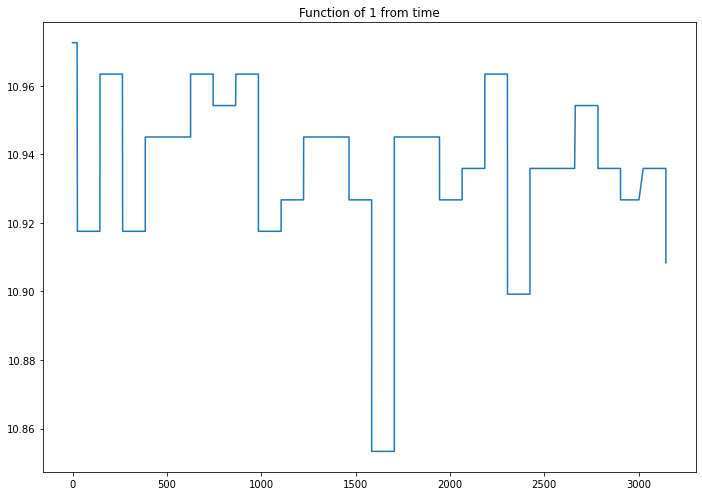

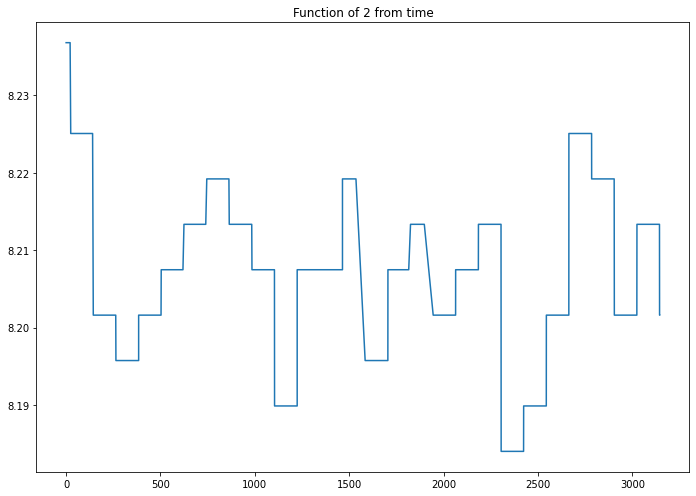

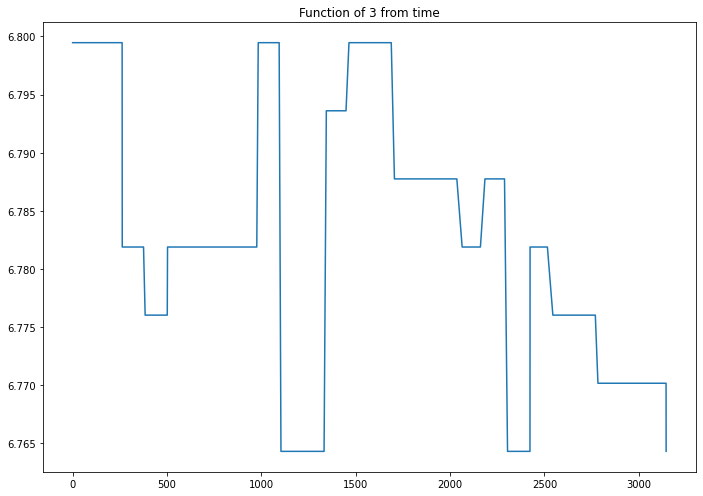

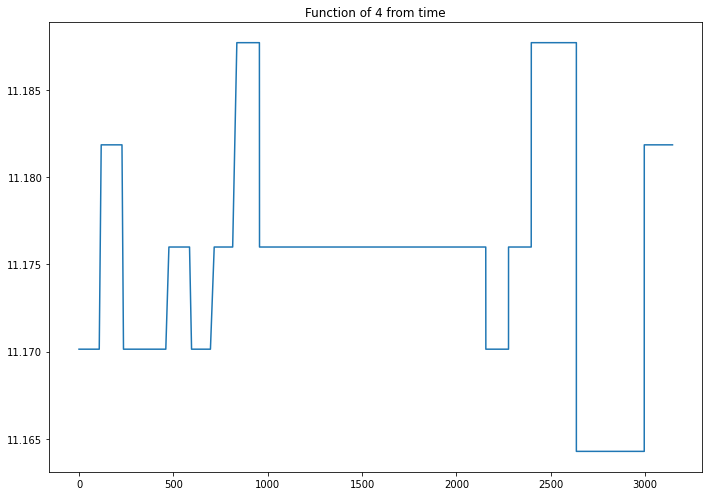

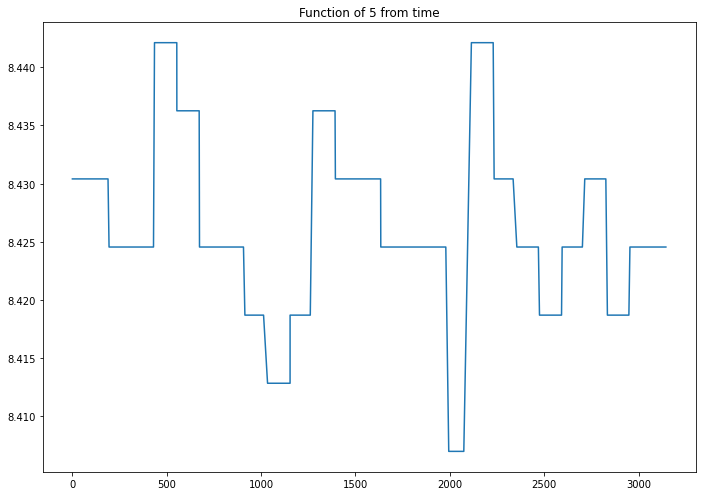

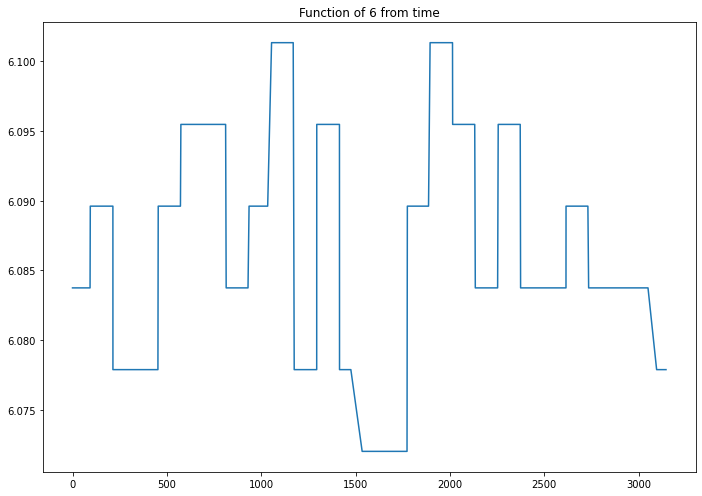

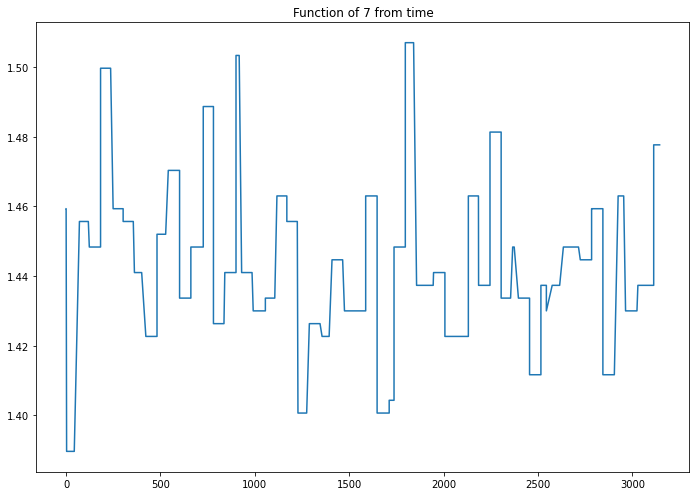

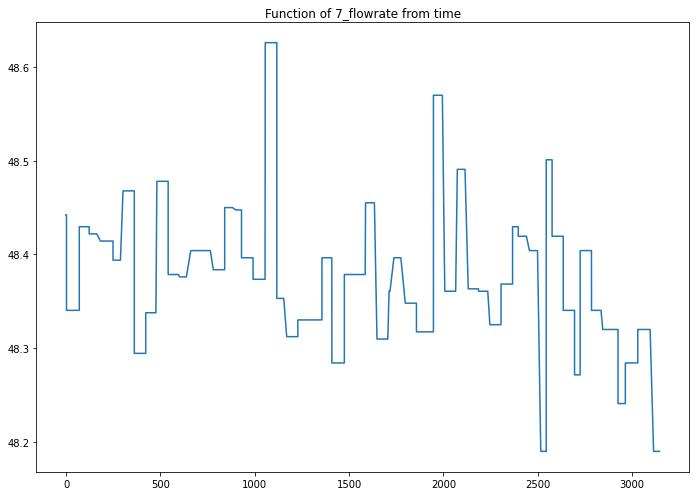

In [ ]:
# Построим графики для первых test_length строк (что примерно происходит)
test_length = 1000

for column in new_df.columns[1:]:
  X = np.array(new_df['Дата'])
  Y = np.array(new_df[column])

  plot_name = f"Function of {column} from time"
  plt.title(plot_name)
  plt.plot(X[:test_length], Y[:test_length])
  plt.show()

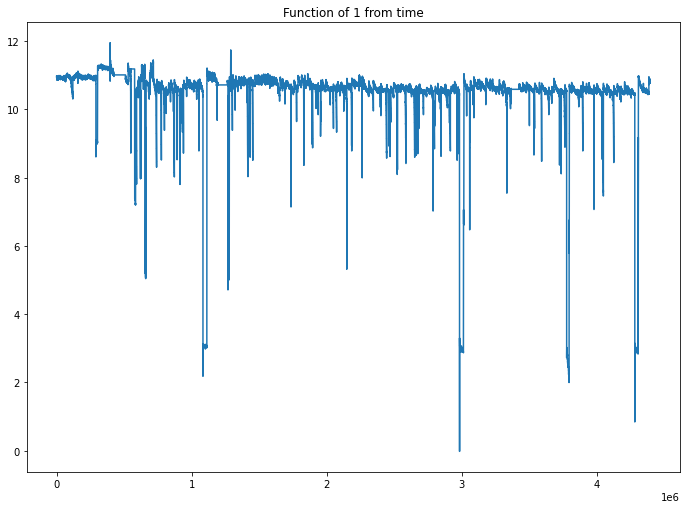

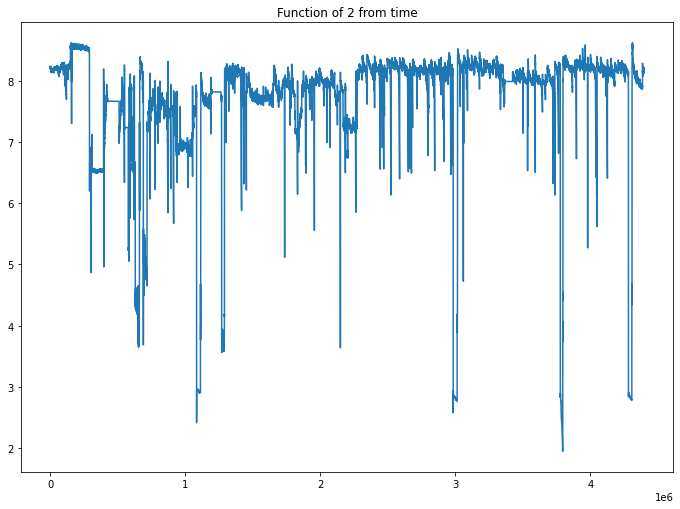

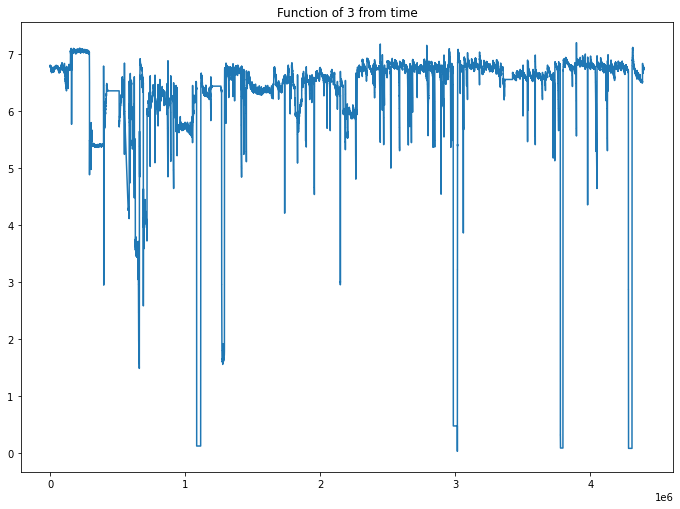

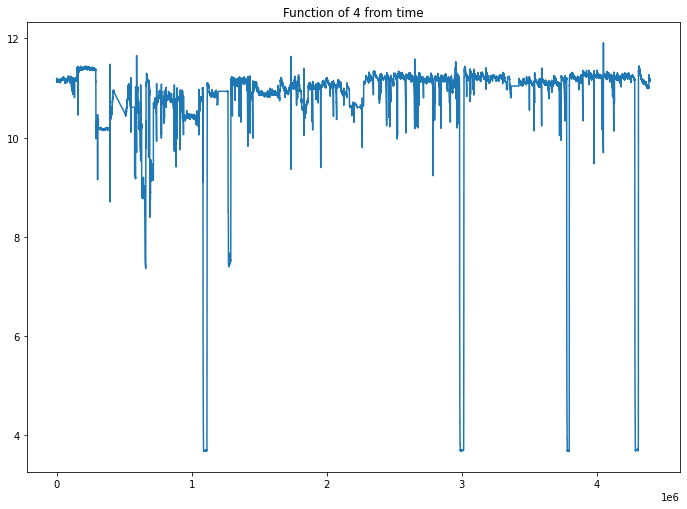

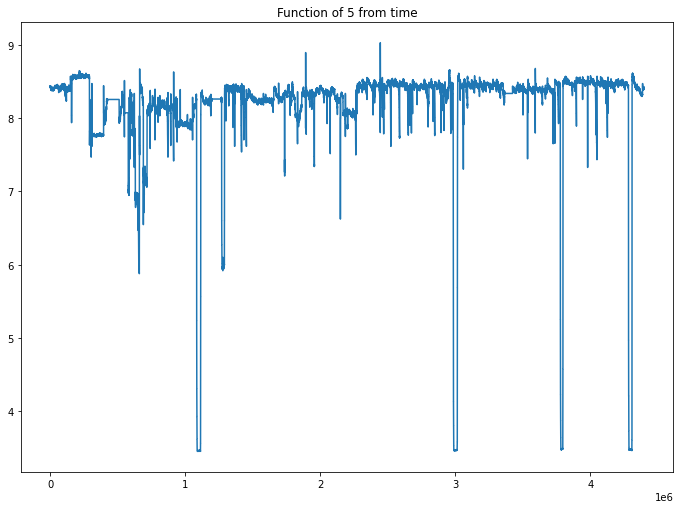

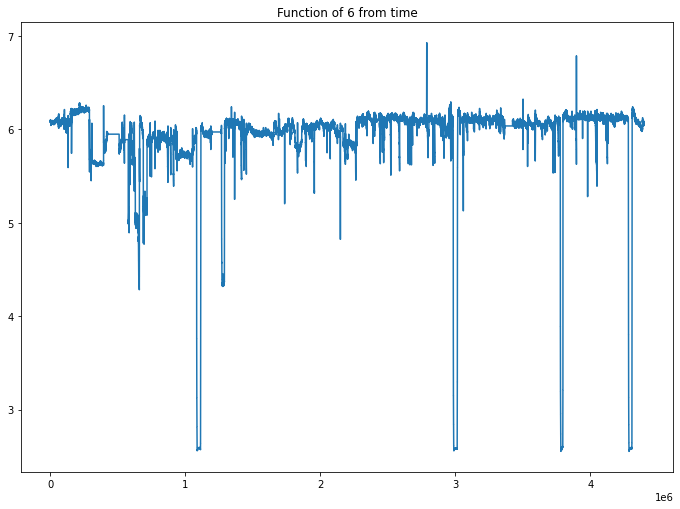

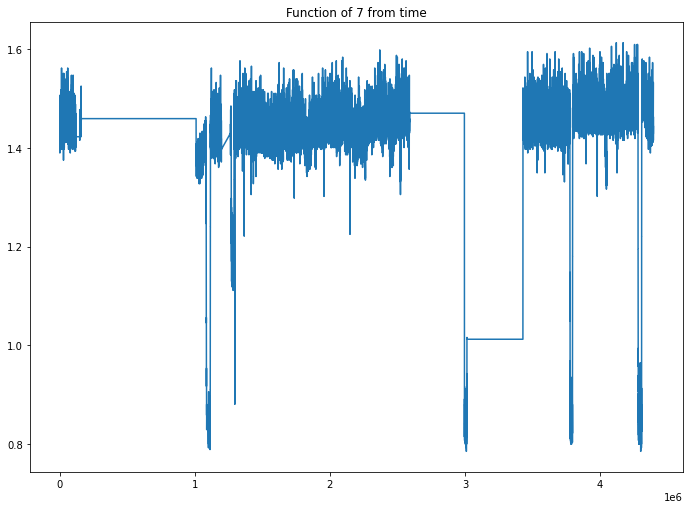

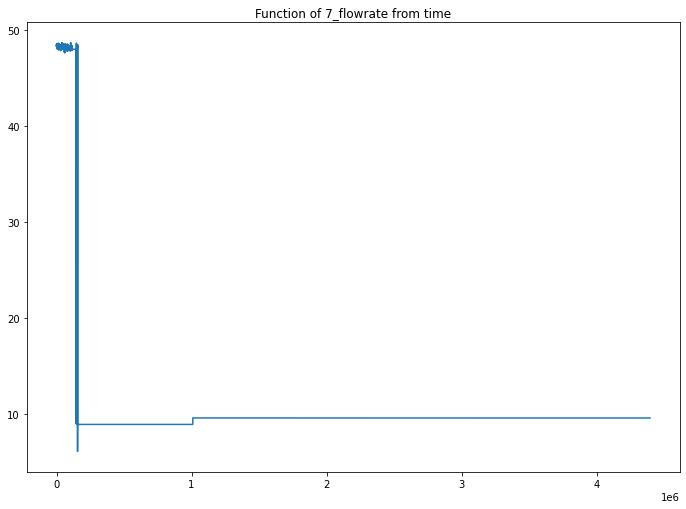

In [ ]:
# Построим графики для всех известны данных, т.к. они несут наибольшую значимость
test_length = df.shape[0]

for column in new_df.columns[1:]:
  X = np.array(new_df['Дата'])
  Y = np.array(new_df[column])

  plot_name = f"Function of {column} from time"
  plt.title(plot_name)
  plt.plot(X[:test_length], Y[:test_length])
  plt.show()

Set test step = 6716


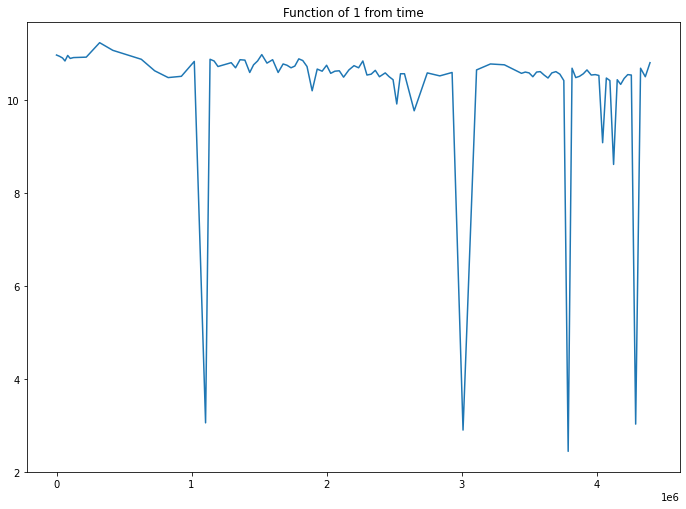

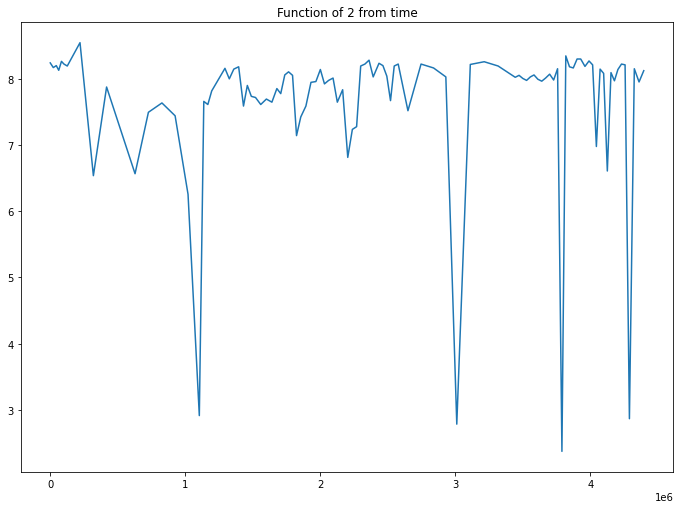

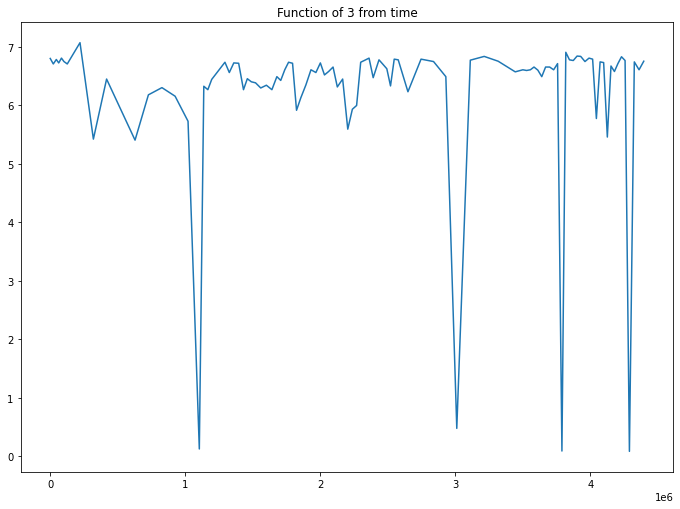

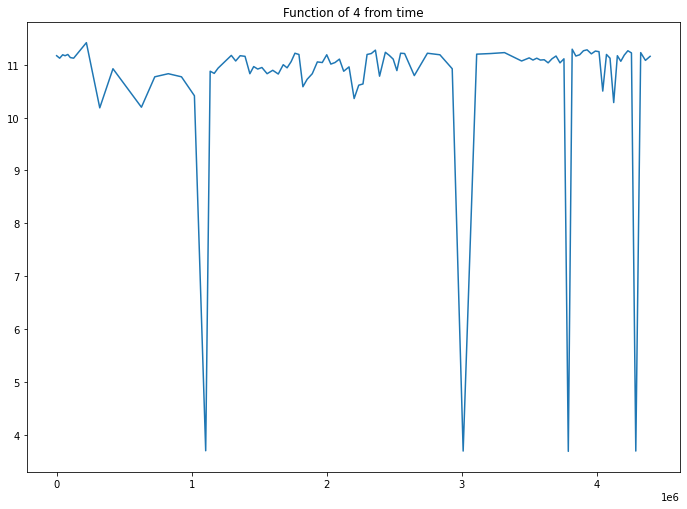

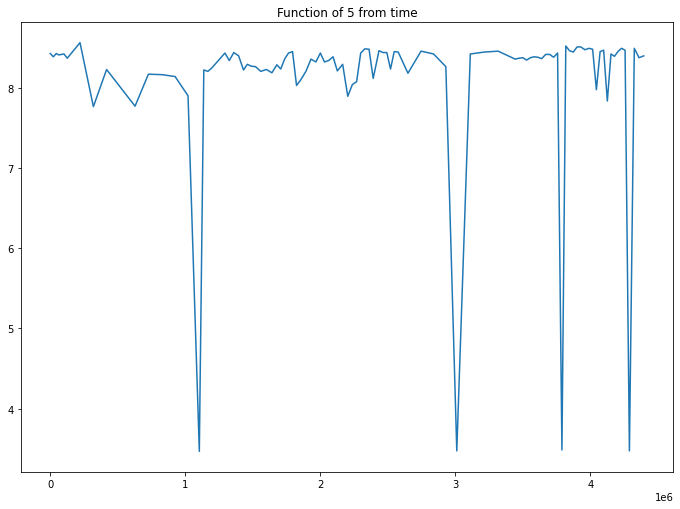

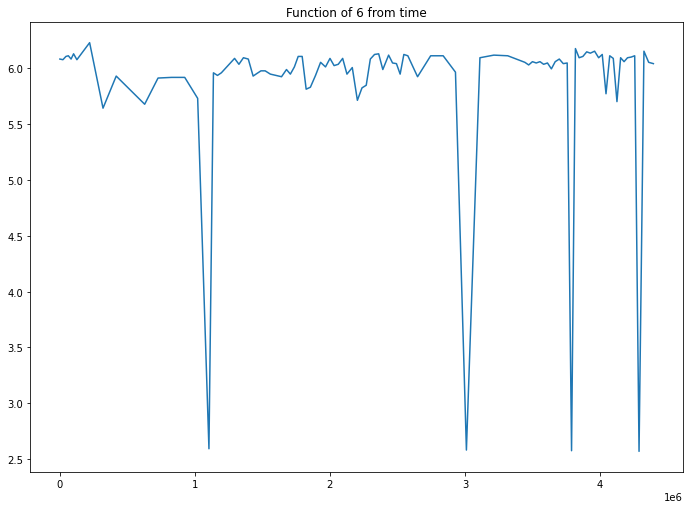

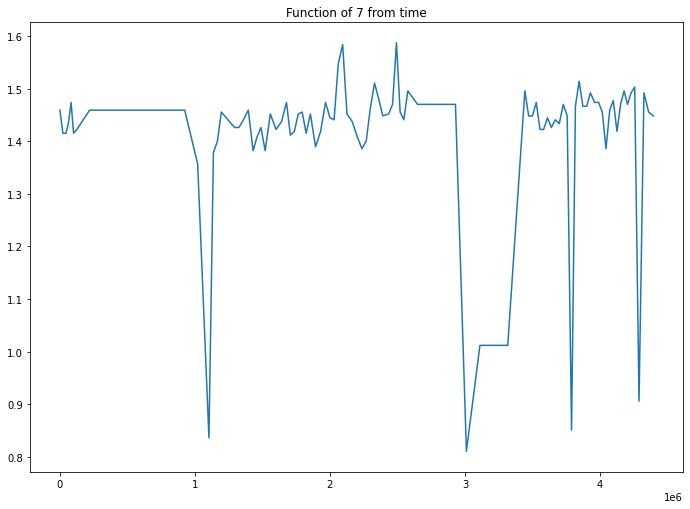

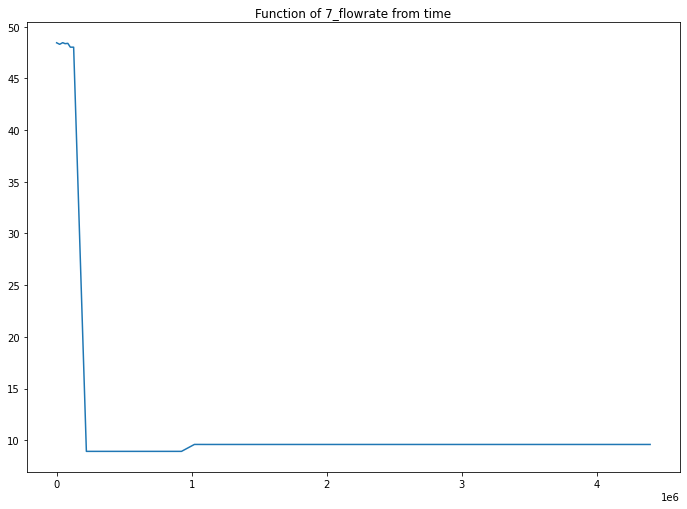

In [ ]:
# Строим график для каких-то 100 точек датасета
# Полезно для общего представления, но плохо, т.к. можем не увидеть выбросы и резкие изменения в данных
num_points = 100
test_step = int(new_df.shape[0] / num_points)
print(f"Set test step = {test_step}")

for column in new_df.columns[1:]:
  X = np.array(new_df['Дата'])
  Y = np.array(new_df[column])

  plot_name = f"Function of {column} from time"
  plt.title(plot_name)
  plt.plot(X[::test_step], Y[::test_step])
  plt.show()

In [ ]:
# Матрица ковариации
data_for_matrix = np.array([])
test_length = new_df.shape[0]

# Соберём данные со всех столбцов
for column in new_df.columns[1:8]:
  column_data = np.array(new_df[column])[:test_length]
  
  if (data_for_matrix.shape[0] != 0):
    data_for_matrix = np.vstack((data_for_matrix, column_data))
  else:
    data_for_matrix = column_data

# Получим саму матрицу
C = np.cov(data_for_matrix)
print("Covariation matrix")
print(C)

Covariation matrix
[[1.47352431 0.96054657 1.15588573 1.25832455 0.83484318 0.59288858
  0.09630991]
 [0.96054657 0.93747755 1.05521287 1.05478862 0.70243811 0.49763141
  0.07218296]
 [1.15588573 1.05521287 1.23111483 1.25312778 0.83346988 0.59052219
  0.08946488]
 [1.25832455 1.05478862 1.25312778 1.33013249 0.88108637 0.62408463
  0.09753197]
 [0.83484318 0.70243811 0.83346988 0.88108637 0.58646809 0.41481854
  0.06489415]
 [0.59288858 0.49763141 0.59052219 0.62408463 0.41481854 0.29442939
  0.04600401]
 [0.09630991 0.07218296 0.08946488 0.09753197 0.06489415 0.04600401
  0.01506822]]


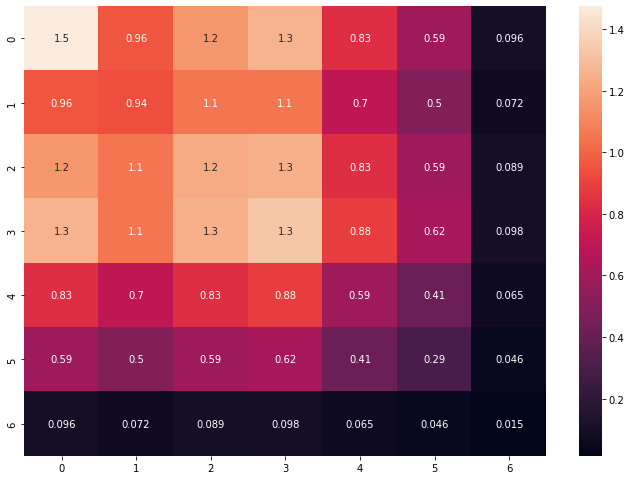

In [ ]:
import seaborn as sn

# Проверка результатов: если большое число по модулю, то сильная зависимость
# В случае сильной зависимости: положительное число - одноврем. возрастают или убывают
# В случае сильной зависимости: отрицательное число - одна возрастает, другая убывает
# Если число маленькое, то зависимости почти нет (! важно ! речь идёт именно о линейной зависимости)

# Для наглядности нарисуем матрицу ковариации (связь чисел и цветов указана справа)
sn.heatmap(C, annot=True)
plt.show()